In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc, confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./../data/mushrooms.csv')


## First tour

### Display

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
data.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6610,p,k,s,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
3547,p,x,s,p,f,c,f,c,n,p,...,s,w,w,p,w,o,p,n,v,d
6108,p,f,s,n,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
207,e,b,s,w,t,a,f,c,b,k,...,s,w,w,p,w,o,p,k,s,m
1247,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g


### Structure

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.dtypes.value_counts()

object    23
Name: count, dtype: int64

In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### NaN & Duplicated

In [9]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(columns="class").duplicated().sum()

0

### Data inspection

In [12]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
data.iloc[:,0].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [14]:
data.iloc[:,0].value_counts(normalize=True).round(2)

class
e    0.52
p    0.48
Name: proportion, dtype: float64

<Axes: ylabel='count'>

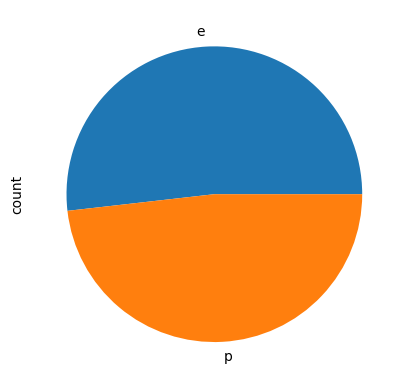

In [15]:
data.iloc[:,0].value_counts().plot(kind="pie")

## Cleaning

#### Label Encoding

In [16]:
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [17]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [19]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


### Rename class in target

In [20]:
data = data.rename(columns={"class":"target"})
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Drop useless columns

In [21]:
tmp = data.nunique()
tmp

target                       2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [22]:
tmp[tmp ==1]

veil-type    1
dtype: int64

In [23]:
cols = tmp[tmp ==1].index
cols

Index(['veil-type'], dtype='object')

In [24]:
data.drop(columns=cols, inplace=True)
data.nunique()

target                       2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Export CSV

In [25]:
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [26]:
data.to_csv("./../data/mushrooms_cleaned.csv", index=False)

## Data preparation

### X & y

In [27]:
X = data.drop(columns="target")
y = data["target"]

In [28]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [29]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

#### Test train split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=42
)

In [31]:
print(f"X_train.shape = {X_train.shape}, y_train.shape {y_train.shape}")
print(f"X_test.shape = {X_test.shape}, y_test.shape {y_test.shape}")

X_train.shape = (5686, 21), y_train.shape (5686,)
X_test.shape = (2438, 21), y_test.shape (2438,)


## Modelisation

### Dummy Classifier

In [32]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [33]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
  pd.Series(y_pred).value_counts()

0    2438
Name: count, dtype: int64

In [35]:
y_test.value_counts(normalize=True)

target
0    0.515587
1    0.484413
Name: proportion, dtype: float64

In [36]:
y_test.values

array([0, 1, 1, ..., 1, 0, 0])

In [37]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

# Most basic model
print(f"Most basic model = tr_score {tr_score}, te_score {te_score}")

Most basic model = tr_score 0.519, te_score 0.5156


In [38]:
def score(estimator):
    """Compute and print train score and test score""" 
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)
    print(f"tr_score {tr_score}, te_score {te_score}")

In [39]:
score(estimator)

tr_score 0.519, te_score 0.5156


In [40]:
pd.Series(y_train).value_counts(normalize=True).round(4)

target
0    0.519
1    0.481
Name: proportion, dtype: float64

In [41]:
pd.Series(y_test).value_counts(normalize=True).round(4)

target
0    0.5156
1    0.4844
Name: proportion, dtype: float64

In [42]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1257,    0],
       [1181,    0]])

In [43]:
mat = pd.DataFrame(mat)

In [44]:
mat

,0,1
0,1257,0
1,1181,0


In [45]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [46]:
def confusion(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    return mat

In [47]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

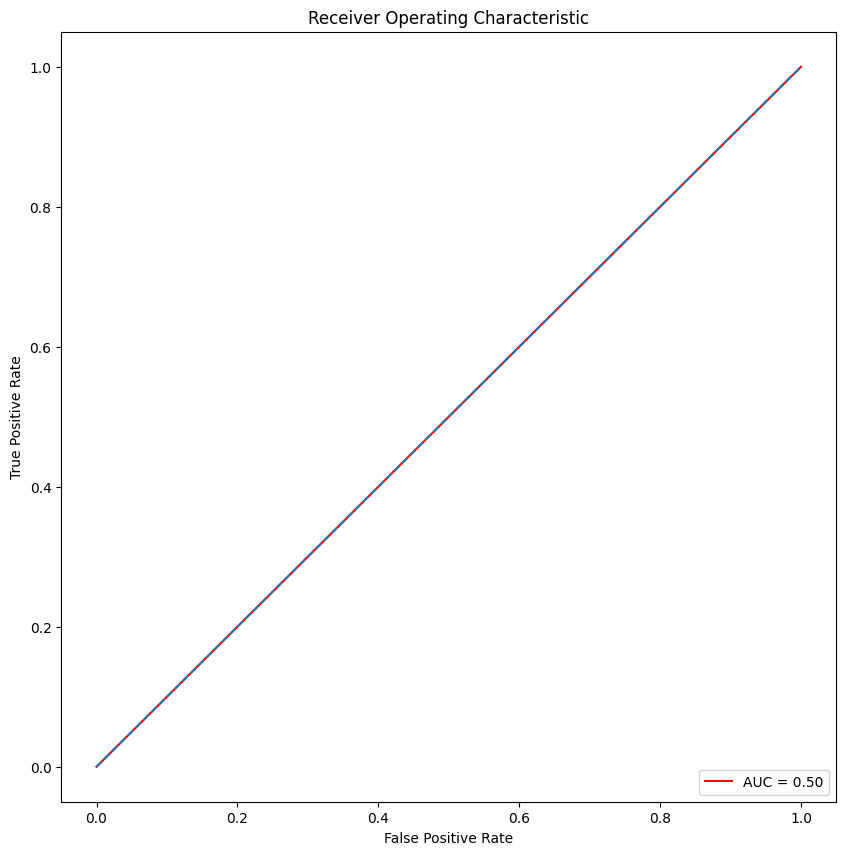

In [49]:
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Logistic Regression & SVM

### Logistic Regression

In [50]:
estimator = LogisticRegression(solver="liblinear")
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [52]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [53]:
score(estimator)
confusion(y_test, y_pred)

tr_score 0.9488, te_score 0.9491


,pred_0,pred_1
test_0,1201,56
test_1,68,1113


In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9489355797205421

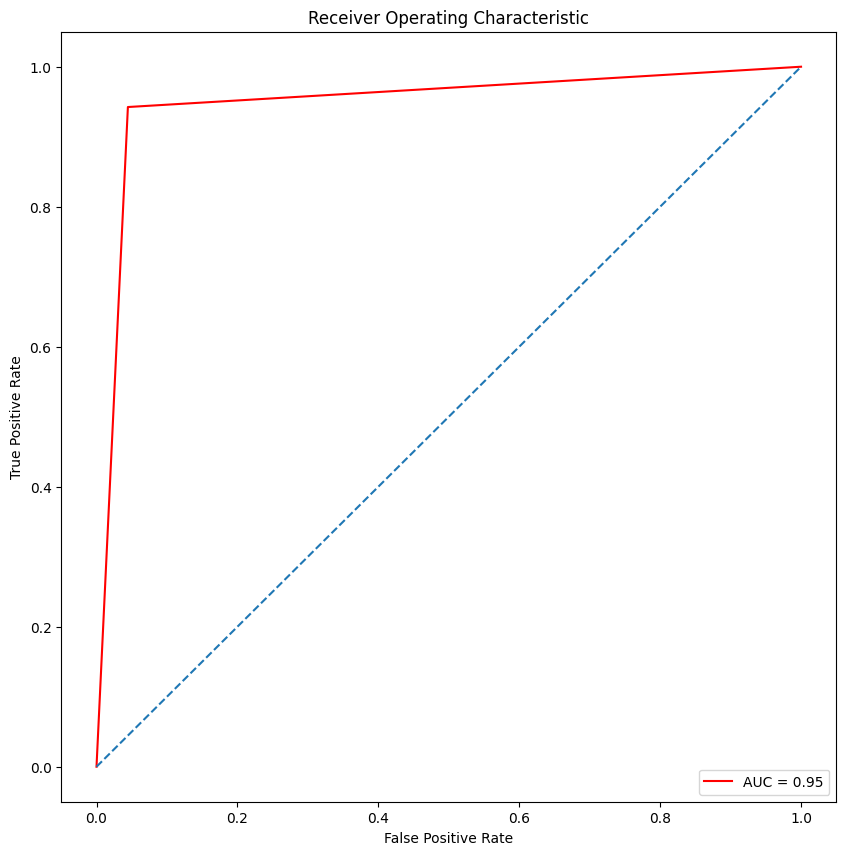

In [55]:
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### SVM

In [56]:
estimator = LinearSVC()
estimator.fit(X_train, y_train)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [57]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [58]:
# y_prob = estimator.predict_proba(X_test).round(2)
# y_prob

In [59]:
score(estimator)
confusion(y_test, y_pred)

tr_score 0.9434, te_score 0.9434


,pred_0,pred_1
test_0,1198,59
test_1,79,1102


In [60]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9430851920186836

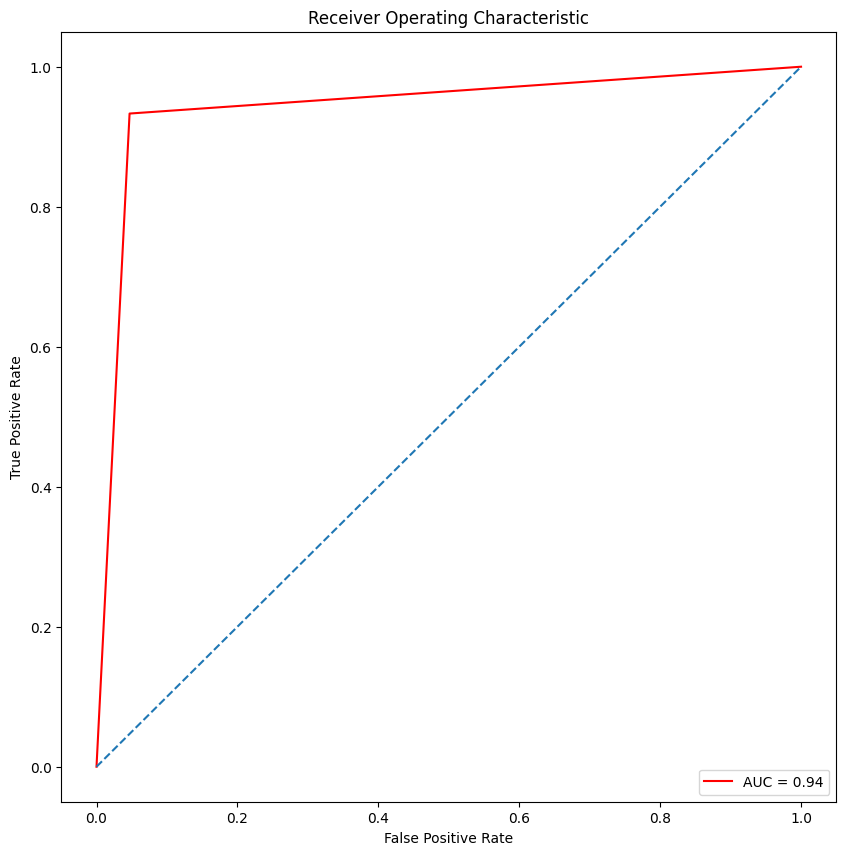

In [61]:
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Hyperparameter

### Logistic Regression

In [69]:
estimator = LogisticRegression()
params = {
    "C": np.logspace(-3,3,7),
    "penalty":["l1","l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear"]
}

In [70]:
grid = GridSearchCV(estimator, params, cv=10, n_jobs=-1,return_train_score=True,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [72]:
best_params = grid.best_params_
best_params

{'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [73]:
res = grid.cv_results_
res

{'mean_fit_time': array([7.26842880e-04, 4.99534607e-04, 6.59799576e-03, 2.35869408e-02,
        1.42430782e-02, 9.64620113e-03, 7.19499588e-04, 7.53736496e-04,
        4.80090857e-02, 3.01444530e-02, 2.76166439e-02, 1.42703295e-02,
        8.12602043e-04, 5.89799881e-04, 1.09227753e-01, 3.65258932e-02,
        3.00769091e-02, 1.94918156e-02, 6.29019737e-04, 3.22961807e-04,
        2.84155896e+00, 6.84241533e-02, 2.71368980e-02, 2.92915821e-02,
        6.75177574e-04, 5.35082817e-04, 3.45683143e+00, 7.45305061e-02,
        2.75372267e-02, 4.83800173e-02, 6.49905205e-04, 3.59749794e-04,
        3.66012073e+00, 9.06177282e-02, 3.09270144e-02, 6.93752289e-02,
        9.78755951e-04, 9.57441330e-04, 4.50770428e+00, 1.54908013e-01,
        3.12373638e-02, 7.44092941e-02]),
 'std_fit_time': array([2.30930769e-04, 6.53891196e-05, 1.56863386e-03, 5.57616130e-03,
        2.87964434e-03, 3.70303851e-03, 3.08330071e-04, 3.01778088e-04,
        5.03572923e-03, 4.05249315e-03, 3.77120377e-03, 5.598

In [74]:
res = grid.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000727,0.000231,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000500,0.000065,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006598,0.001569,0.000900,0.000184,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.755712,0.789104,...,0.772718,0.771546,0.769201,0.769982,0.772177,0.771981,0.769050,0.774521,0.771368,0.001781
3,0.023587,0.005576,0.001399,0.000653,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
4,0.014243,0.002880,0.001376,0.000604,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
5,0.009646,0.003703,0.001012,0.000355,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.861160,0.891037,...,0.871409,0.869846,0.869846,0.870823,0.867722,0.871630,0.870066,0.871434,0.870110,0.001349
6,0.000719,0.000308,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000754,0.000302,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.048009,0.005036,0.001570,0.001082,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.905097,0.920914,...,0.903654,0.905609,0.907758,0.904241,0.906018,0.902892,0.904259,0.903869,0.904541,0.001632
9,0.030144,0.004052,0.001175,0.000471,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.903339,0.910369,...,0.908736,0.909126,0.911276,0.908149,0.908753,0.909340,0.908949,0.909144,0.909231,0.000786


In [75]:
cols = [ i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [77]:
res = res[cols]
res = res.sort_values("rank_test_score")
res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.074409,0.011259,0.000875,0.000047,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960428,0.012545,1,0.961836,0.003616
39,0.154908,0.012412,0.001130,0.000511,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
38,4.507704,0.307096,0.001461,0.001307,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960252,0.012592,3,0.961465,0.003567
32,3.660121,0.768995,0.001177,0.000710,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012309,4,0.961250,0.003625
33,0.090618,0.018819,0.001115,0.000769,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506
26,3.456831,0.632333,0.000935,0.000056,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959372,0.012845,6,0.960996,0.003625
35,0.069375,0.006161,0.001463,0.000996,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003555
40,0.031237,0.003656,0.001260,0.000693,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953920,0.010497,8,0.955622,0.002217
27,0.074531,0.017571,0.000826,0.000089,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.030927,0.003204,0.001283,0.000647,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953394,0.010822,10,0.955915,0.002975


In [78]:
def resultize(grid):
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [ i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    return res

[CV 4/10; 11/42] END C=0.01, penalty=12, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 12/42] START C=0.01, penalty=12, solver=liblinear.....................
[CV 3/10; 12/42] END C=0.01, penalty=12, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 12/42] START C=0.01, penalty=12, solver=liblinear.....................
[CV 4/10; 12/42] END C=0.01, penalty=12, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 12/42] START C=0.01, penalty=12, solver=liblinear.....................
[CV 5/10; 12/42] END C=0.01, penalty=12, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10; 12/42] START C=0.01, penalty=12, solver=liblinear.....................
[CV 6/10; 12/42] END C=0.01, penalty=12, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10; 12/42] START C=0.01, penalty=12, solver=liblinear.....................
[CV 7/10; 12/42] END C=0.01, penalty=12, solver=liblinear;, scor

In [79]:
resultize(grid).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.074409,0.011259,0.000875,0.000047,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960428,0.012545,1,0.961836,0.003616
39,0.154908,0.012412,0.001130,0.000511,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
38,4.507704,0.307096,0.001461,0.001307,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960252,0.012592,3,0.961465,0.003567
32,3.660121,0.768995,0.001177,0.000710,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012309,4,0.961250,0.003625
33,0.090618,0.018819,0.001115,0.000769,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506
26,3.456831,0.632333,0.000935,0.000056,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959372,0.012845,6,0.960996,0.003625
35,0.069375,0.006161,0.001463,0.000996,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003555
40,0.031237,0.003656,0.001260,0.000693,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953920,0.010497,8,0.955622,0.002217
27,0.074531,0.017571,0.000826,0.000089,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.030927,0.003204,0.001283,0.000647,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953394,0.010822,10,0.955915,0.002975


In [81]:
estimator = LogisticRegression(penalty="l2",C=1000,solver="liblinear")
estimator

LogisticRegression(C=1000, solver='liblinear')

In [82]:
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=1000.0, solver='liblinear')

In [89]:
estimator = LogisticRegression(**best_params)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [90]:
score(estimator)
confusion(y_test, y_pred)

tr_score 0.9618, te_score 0.9623


,pred_0,pred_1
test_0,1209,48
test_1,44,1137


In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9622786401233532

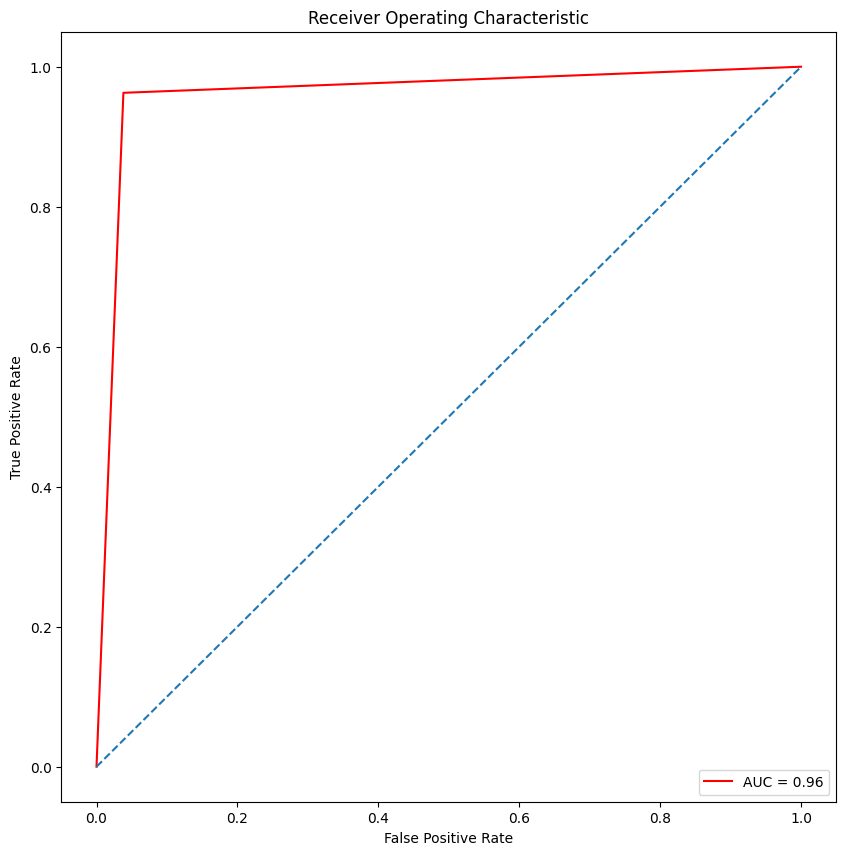

In [85]:
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### SVM

In [93]:
estimator = LinearSVC()
params = { "C": np.logspace(-3,3,7) }

In [94]:
grid = GridSearchCV(estimator, params, cv=10,n_jobs=-1, return_train_score=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [95]:
print(grid.best_params_)

{'C': 1.0}


In [96]:
resultize(grid).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.211097,0.014994,0.001383,0.000748,1.0,{'C': 1.0},0.947415,0.007559,1,0.949447,0.004959
2,0.192731,0.022536,0.001080,0.000455,0.1,{'C': 0.1},0.945654,0.008276,2,0.947493,0.001389
4,0.237615,0.050178,0.001747,0.001006,10.0,{'C': 10.0},0.943900,0.010667,3,0.945128,0.006095
1,0.026029,0.004299,0.001490,0.000651,0.01,{'C': 0.01},0.936686,0.006242,4,0.938230,0.002168
0,0.012256,0.004188,0.002075,0.001623,0.001,{'C': 0.001},0.913471,0.006041,5,0.914175,0.001137
5,0.209349,0.011271,0.001612,0.000995,100.0,{'C': 100.0},0.907282,0.073923,6,0.906557,0.067668
6,0.203074,0.031281,0.001183,0.000549,1000.0,{'C': 1000.0},0.896229,0.081890,7,0.895729,0.082963


In [98]:
estimator = LinearSVC(**grid.best_params_)
estimator.fit(X_train, y_train)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [100]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [101]:
score(estimator)
confusion(y_test, y_pred)

tr_score 0.9479, te_score 0.9463


,pred_0,pred_1
test_0,1201,56
test_1,75,1106


In [102]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9459719895427267

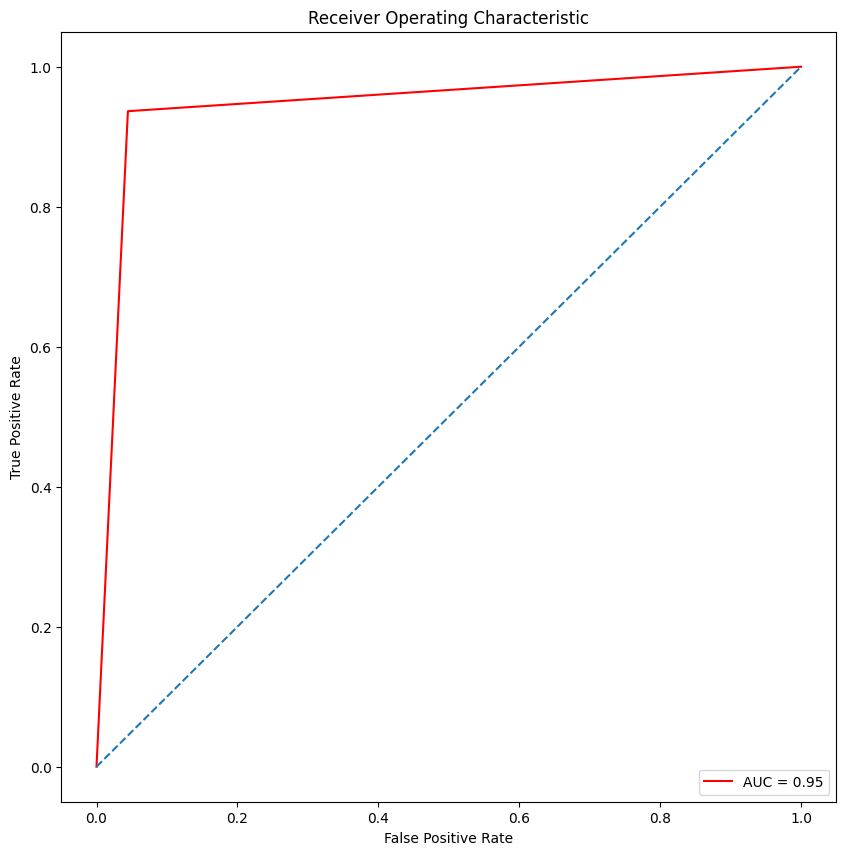

In [103]:
plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()